In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diamonds.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


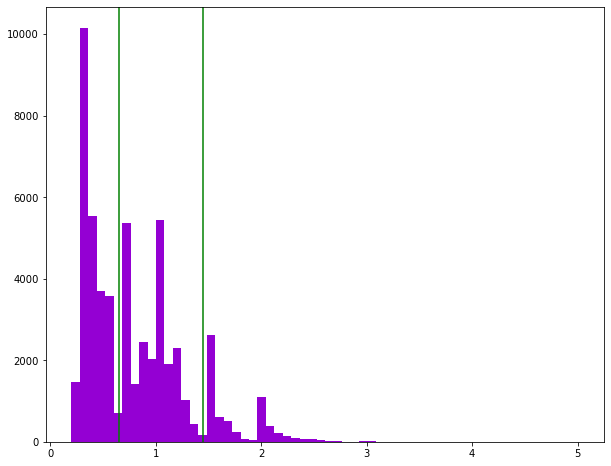

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(data['carat'], bins = 60, color = 'darkviolet')
plt.axvline(0.65, c='g')
plt.axvline(1.45, c='g')

In [4]:
data_cat = data.copy()
data_cat['carat_label'] = 0
data_cat.loc[data_cat['carat'] < 0.65, 'carat_label'] = 'small'
data_cat.loc[(data_cat['carat'] >= 0.65) & (data_cat['carat'] <= 1.45) , 'carat_label'] = 'medium'
data_cat.loc[data_cat['carat'] > 1.45, 'carat_label'] = 'big'

In [5]:
data_cat['carat_label'].value_counts()

small     24969
medium    22679
big        6292
Name: carat_label, dtype: int64

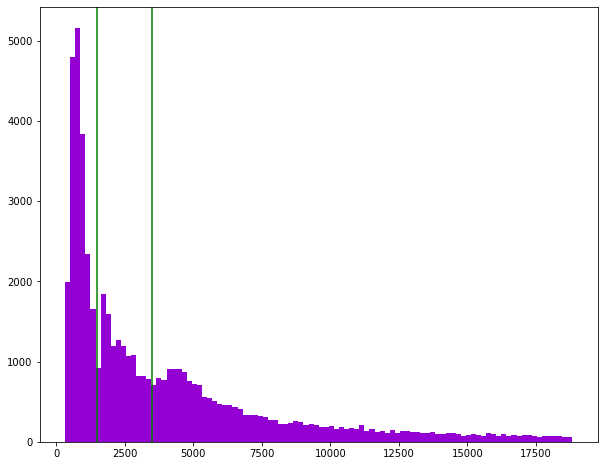

In [6]:
plt.figure(figsize=(10, 8))
plt.hist(data['price'], bins = 100, color = 'darkviolet')
plt.axvline(1500, c='g')
plt.axvline(3500, c='g')

In [7]:
data_cat['price_label'] = 0
data_cat.loc[data_cat['price'] < 1500, 'price_label'] = 'cheap'
data_cat.loc[(data_cat['price'] >= 1500) & (data_cat['price'] <= 3500) , 'price_label'] = 'medium'
data_cat.loc[data_cat['price'] > 3500, 'price_label'] = 'expensive'

In [8]:
data_cat['price_label'].value_counts(sort=False)

cheap        20010
medium       12490
expensive    21440
Name: price_label, dtype: int64

In [9]:
from sklearn.cluster import KMeans
def clasters(data, n_clusters):
    criterions = []
    labels = []

    for i in range(12):
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=1)
        kmeans.fit(data)
        criterions.append(kmeans.inertia_)
        labels.append(kmeans.labels_)

    opt_ind = np.argmin(criterions)
    opt_criterion = criterions[opt_ind]
    opt_label = labels[opt_ind]
    
    return criterions, labels, opt_criterion, opt_label

In [10]:
numeric =  ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
norm_data = (data[numeric] - data[numeric].mean()) / data[numeric].std()
criterions5, labels5, opt_criterion5, opt_label5 = clasters(norm_data, 5)

In [11]:
claster_data5 = data[numeric].copy()
claster_data5.loc[:, 'label5'] = opt_label5

Карат - кластер и цена - кластер

In [12]:
crosstab_carat1 = pd.crosstab(data_cat['carat_label'], claster_data5['label5'], margins = True)
crosstab_carat2 = pd.crosstab(data_cat['carat_label'], claster_data5['label5'], margins = False)
crosstab_carat1 # матрица сопряженности

label5,0,1,2,3,4,All
carat_label,,,,,,
big,106,2,5970,213,1,6292
medium,16081,99,714,5732,53,22679
small,32,7625,2,76,17234,24969
All,16219,7726,6686,6021,17288,53940


In [13]:
crosstab_price1 = pd.crosstab(data_cat['price_label'], claster_data5['label5'], margins = True)
crosstab_price2 = pd.crosstab(data_cat['price_label'], claster_data5['label5'], margins = False)
crosstab_price1 # матрица сопряженности

label5,0,1,2,3,4,All
price_label,,,,,,
cheap,65,6296,0,31,13618,20010
expensive,10636,18,6684,4076,26,21440
medium,5518,1412,2,1914,3644,12490
All,16219,7726,6686,6021,17288,53940


In [14]:
t2 = crosstab_price1.reindex(['cheap','medium','expensive'])
t2

label5,0,1,2,3,4,All
price_label,,,,,,
cheap,65,6296,0,31,13618,20010
medium,5518,1412,2,1914,3644,12490
expensive,10636,18,6684,4076,26,21440


In [15]:
carat_prob = pd.crosstab(data_cat['carat_label'], claster_data5['label5'], normalize = True, margins = True)
carat_prob # частоты

label5,0,1,2,3,4,All
carat_label,,,,,,
big,0.001965,0.000037,0.110679,0.003949,0.000019,0.116648
medium,0.298128,0.001835,0.013237,0.106266,0.000983,0.420449
small,0.000593,0.141361,0.000037,0.001409,0.319503,0.462903
All,0.300686,0.143233,0.123953,0.111624,0.320504,1.000000


In [16]:
price_prob = pd.crosstab(data_cat['price_label'], claster_data5['label5'], normalize = True, margins = True)
price_prob # частоты

label5,0,1,2,3,4,All
price_label,,,,,,
cheap,0.001205,0.116722,0.000000,0.000575,0.252466,0.370968
expensive,0.197182,0.000334,0.123915,0.075565,0.000482,0.397479
medium,0.102299,0.026177,0.000037,0.035484,0.067557,0.231554
All,0.300686,0.143233,0.123953,0.111624,0.320504,1.000000


In [17]:
np.array(crosstab_carat1[-1:])[0][:-1]

array([16219,  7726,  6686,  6021, 17288])

In [18]:
cond_prob_carat = np.divide(crosstab_carat2, np.array(crosstab_carat1[-1:])[0][:-1])
cond_prob_carat # матрица условных вероятностей (суммы по столбцам равны 1)

label5,0,1,2,3,4
carat_label,,,,,
big,0.006536,0.000259,0.892911,0.035376,0.000058
medium,0.991491,0.012814,0.106790,0.952001,0.003066
small,0.001973,0.986927,0.000299,0.012622,0.996876


In [19]:
cond_prob_price = np.divide(crosstab_price2, np.array(crosstab_price1[-1:])[0][:-1])
cond_prob_price # матрица условных вероятностей (суммы по столбцам равны 1)

label5,0,1,2,3,4
price_label,,,,,
cheap,0.004008,0.814911,0.000000,0.005149,0.787714
expensive,0.655774,0.002330,0.999701,0.676964,0.001504
medium,0.340218,0.182760,0.000299,0.317887,0.210782


In [20]:
t_cond_prob_price = cond_prob_price.reindex(['cheap','medium','expensive'])
t_cond_prob_price

label5,0,1,2,3,4
price_label,,,,,
cheap,0.004008,0.814911,0.000000,0.005149,0.787714
medium,0.340218,0.182760,0.000299,0.317887,0.210782
expensive,0.655774,0.002330,0.999701,0.676964,0.001504


In [21]:
carat_prob.iloc[:, -1].values[:, None] 

array([[0.11664813],
       [0.42044865],
       [0.46290323],
       [1.        ]])

In [22]:
carat_prob.iloc[-1, :].values[None, :]

array([[0.30068595, 0.14323322, 0.12395254, 0.11162403, 0.32050426,
        1.        ]])

In [23]:
c_prob = carat_prob.iloc[:, -1].values[:, None] @ carat_prob.iloc[-1, :].values[None, :]
c_prob # матрица распределения при условии независимости признаков

array([[0.03507445, 0.01670789, 0.01445883, 0.01302073, 0.03738622,
        0.11664813],
       [0.126423  , 0.06022221, 0.05211568, 0.04693217, 0.13475558,
        0.42044865],
       [0.13918849, 0.06630312, 0.05737803, 0.05167112, 0.14836246,
        0.46290323],
       [0.30068595, 0.14323322, 0.12395254, 0.11162403, 0.32050426,
        1.        ]])

In [24]:
p_prob = price_prob.iloc[:, -1].values[:, None] @ price_prob.iloc[-1, :].values[None, :]
p_prob # матрица распределения при условии независимости признаков

array([[0.11154479, 0.0531349 , 0.04598239, 0.04140891, 0.11889674,
        0.37096774],
       [0.11951625, 0.05693215, 0.04926849, 0.04436817, 0.12739361,
        0.39747868],
       [0.06962491, 0.03316617, 0.02870165, 0.02584694, 0.07421391,
        0.23155358],
       [0.30068595, 0.14323322, 0.12395254, 0.11162403, 0.32050426,
        1.        ]])

In [32]:
c_quetle =carat_prob / c_prob - 1
c_quetle*100 # матрица индексов Кетле

label5,0,1,2,3,4,All
carat_label,,,,,,
big,-94.397214,-99.778079,665.473547,-69.672738,-99.950412,0.0
medium,135.817494,-96.952333,-74.600868,126.425114,-99.270848,0.0
small,-99.573778,113.203798,-99.935379,-97.273191,115.353100,0.0
All,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [31]:
p_quetle = price_prob / p_prob - 1
p_quetle # матрица индексов Кетле

In [33]:
t_p_quetle = p_quetle.reindex(['cheap','medium','expensive'])
t_p_quetle*100

label5,0,1,2,3,4,All
price_label,,,,,,
cheap,-98.919678,119.671578,-100.000000,-98.612104,112.340301,0.0
medium,46.928527,-21.072473,-99.870815,37.284596,-8.970508,0.0
expensive,64.983463,-99.413856,151.510563,70.314533,-99.621632,0.0


In [36]:
np.sum((c_quetle.iloc[:-1, :-1] * carat_prob.iloc[:-1, :-1]).values)*100

178.5085590387909

In [37]:
np.sum((p_quetle.iloc[:-1, :-1] * price_prob.iloc[:-1, :-1]).values)*100

83.93716345473837

In [1]:
c_quetle

NameError: name 'c_quetle' is not defined

In [38]:
c_kxi = (carat_prob - c_prob)**2 / c_prob
c_kxi = c_kxi.iloc[:-1, :-1]
c_kxi # хи-квадрат

label5,0,1,2,3,4
carat_label,,,,,
big,0.031254,0.016634,0.640317,0.006321,0.037349
medium,0.233205,0.056607,0.029004,0.075013,0.132798
small,0.138005,0.084968,0.057304,0.048892,0.197416


In [39]:
np.sum(c_kxi.values)

1.7850855903879088

In [40]:
p_kxi = (price_prob - p_prob)**2 / p_prob
p_kxi = p_kxi.iloc[:-1, :-1]
p_kxi # хи-квадрат

label5,0,1,2,3,4
price_label,,,,,
cheap,0.109148,0.076096,0.045982,0.040267,0.150052
expensive,0.050470,0.056267,0.113098,0.021936,0.126431
medium,0.015333,0.001473,0.028628,0.003593,0.000597


In [41]:
np.sum(p_kxi.values)

0.8393716345473835